

-   **Name**: Sri Sai Harshavardhan Reddy Vippala
-   **Net ID**: ssv315

In this lab
-----------

Many college courses conclude by giving students the opportunity to
evaluate the course and the instructor anonymously. In the article
“Beauty in the Classroom: Professors’ Pulchritude and Putative
Pedagogical Productivity”
([PDF](https://www.nber.org/papers/w9853.pdf)), authors Daniel Hamermesh
and Amy M. Parker suggest (based on a data set of teaching evaluation
scores collected at UT Austin) that student evaluation scores can
partially be predicted by features unrelated to teaching, such as the
physical attractiveness of the instructor.

In this lab, we will use this data to try and predict the average
instructor rating with a multiple linear regression.

### Attribution

Parts of this lab are based on a lab assignment from the OpenIntro
textbook “Introductory Statistics with Randomization and Simulation”
that is released under a Creative Commons Attribution-ShareAlike 3.0
Unported license. The book website is at
<https://www.openintro.org/book/isrs/>. You can read a PDF copy of the
book for free and watch video lectures associated with the book at that
URL. You can also see the lab assignment that this one is based on.

### Data

The data were gathered from end of semester student evaluations for a
large sample of professors from the University of Texas at Austin. In
addition, six students looked at a photograph of each professor in the
sample, and rated the professors’ physical appearance. More
specifically:

> Each of the professors’ pictures was rated by each of six
> undergraduate students: Three women and three men, with one of each
> gender being a lower-division, two upper-division students (to accord
> with the distribution of classes across the two levels). The raters
> were told to use a 10 (highest) to 1 rating scale, to concentrate on
> the physiognomy of the professor in the picture, to make their ratings
> independent of age, and to keep 5 in mind as an average.

We are using a slightly modified version of the original data set from
the published paper. The dataset was released along with the textbook
“Data Analysis Using Regression and Multilevel/Hierarchical Models”
(Gelman and Hill, 2007).)

### Setup

We will start by importing relevant libraries, setting up our notebook,
reading in the data, and checking that it was loaded correctly.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [0]:
url = 'https://www.openintro.org/stat/data/evals.csv'
df = pd.read_csv(url)
df.head()
df.columns
df.shape

,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,cls_profs,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,single,multi credit,5,7,6,2,4,6,5.0,not formal,color
1,4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,single,multi credit,5,7,6,2,4,6,5.0,not formal,color
2,3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,single,multi credit,5,7,6,2,4,6,5.0,not formal,color
3,4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,single,multi credit,5,7,6,2,4,6,5.0,not formal,color
4,4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,multiple,multi credit,4,4,2,2,3,3,3.0,not formal,color


Index(['score', 'rank', 'ethnicity', 'gender', 'language', 'age',
       'cls_perc_eval', 'cls_did_eval', 'cls_students', 'cls_level',
       'cls_profs', 'cls_credits', 'bty_f1lower', 'bty_f1upper', 'bty_f2upper',
       'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'bty_avg', 'pic_outfit',
       'pic_color'],
      dtype='object')

(463, 21)

Each row in the data frame represents a different course, and columns
represent variables about the courses and professors. The data
dictionary is reproduced here from the OpenIntro lab:

| variable        | description                                                                           |
|-----------------|---------------------------------------------------------------------------------------|
| `score`         | average professor evaluation score: (1) very unsatisfactory - (5) excellent.          |
| `rank`          | rank of professor: teaching, tenure track, tenured.                                   |
| `ethnicity`     | ethnicity of professor: not minority, minority.                                       |
| `gender`        | gender of professor: female, male.                                                    |
| `language`      | language of school where professor received education: english or non-english.        |
| `age`           | age of professor.                                                                     |
| `cls_perc_eval` | percent of students in class who completed evaluation.                                |
| `cls_did_eval`  | number of students in class who completed evaluation.                                 |
| `cls_students`  | total number of students in class.                                                    |
| `cls_level`     | class level: lower, upper.                                                            |
| `cls_profs`     | number of professors teaching sections in course in sample: single, multiple.         |
| `cls_credits`   | number of credits of class: one credit (lab, PE, etc.), multi credit.                 |
| `bty_f1lower`   | beauty rating of professor from lower level female: (1) lowest - (10) highest.        |
| `bty_f1upper`   | beauty rating of professor from upper level female: (1) lowest - (10) highest.        |
| `bty_f2upper`   | beauty rating of professor from second upper level female: (1) lowest - (10) highest. |
| `bty_m1lower`   | beauty rating of professor from lower level male: (1) lowest - (10) highest.          |
| `bty_m1upper`   | beauty rating of professor from upper level male: (1) lowest - (10) highest.          |
| `bty_m2upper`   | beauty rating of professor from second upper level male: (1) lowest - (10) highest.   |
| `bty_avg`       | average beauty rating of professor.                                                   |
| `pic_outfit`    | outfit of professor in picture: not formal, formal.                                   |
| `pic_color`     | color of professor’s picture: color, black & white.                                   |

### Explore data

As always, start by exploring the data:

In [0]:
df.describe()

,score,age,cls_perc_eval,cls_did_eval,cls_students,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,4.174730,48.365011,74.427788,36.624190,55.177106,3.963283,5.019438,5.213823,3.412527,4.146868,4.751620,4.417844
std,0.543865,9.802742,16.756311,45.018481,75.072800,1.873936,1.934437,2.018224,1.637102,2.110586,1.575266,1.527380
min,2.300000,29.000000,10.416670,5.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.667000
25%,3.800000,42.000000,62.696165,15.000000,19.000000,2.000000,4.000000,4.000000,2.000000,3.000000,4.000000,3.167000
50%,4.300000,48.000000,76.923080,23.000000,29.000000,4.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.333000
75%,4.600000,57.000000,87.249170,40.000000,60.000000,5.000000,7.000000,6.000000,5.000000,5.000000,6.000000,5.500000
max,5.000000,73.000000,100.000000,380.000000,581.000000,8.000000,9.000000,10.000000,7.000000,9.000000,9.000000,8.167000


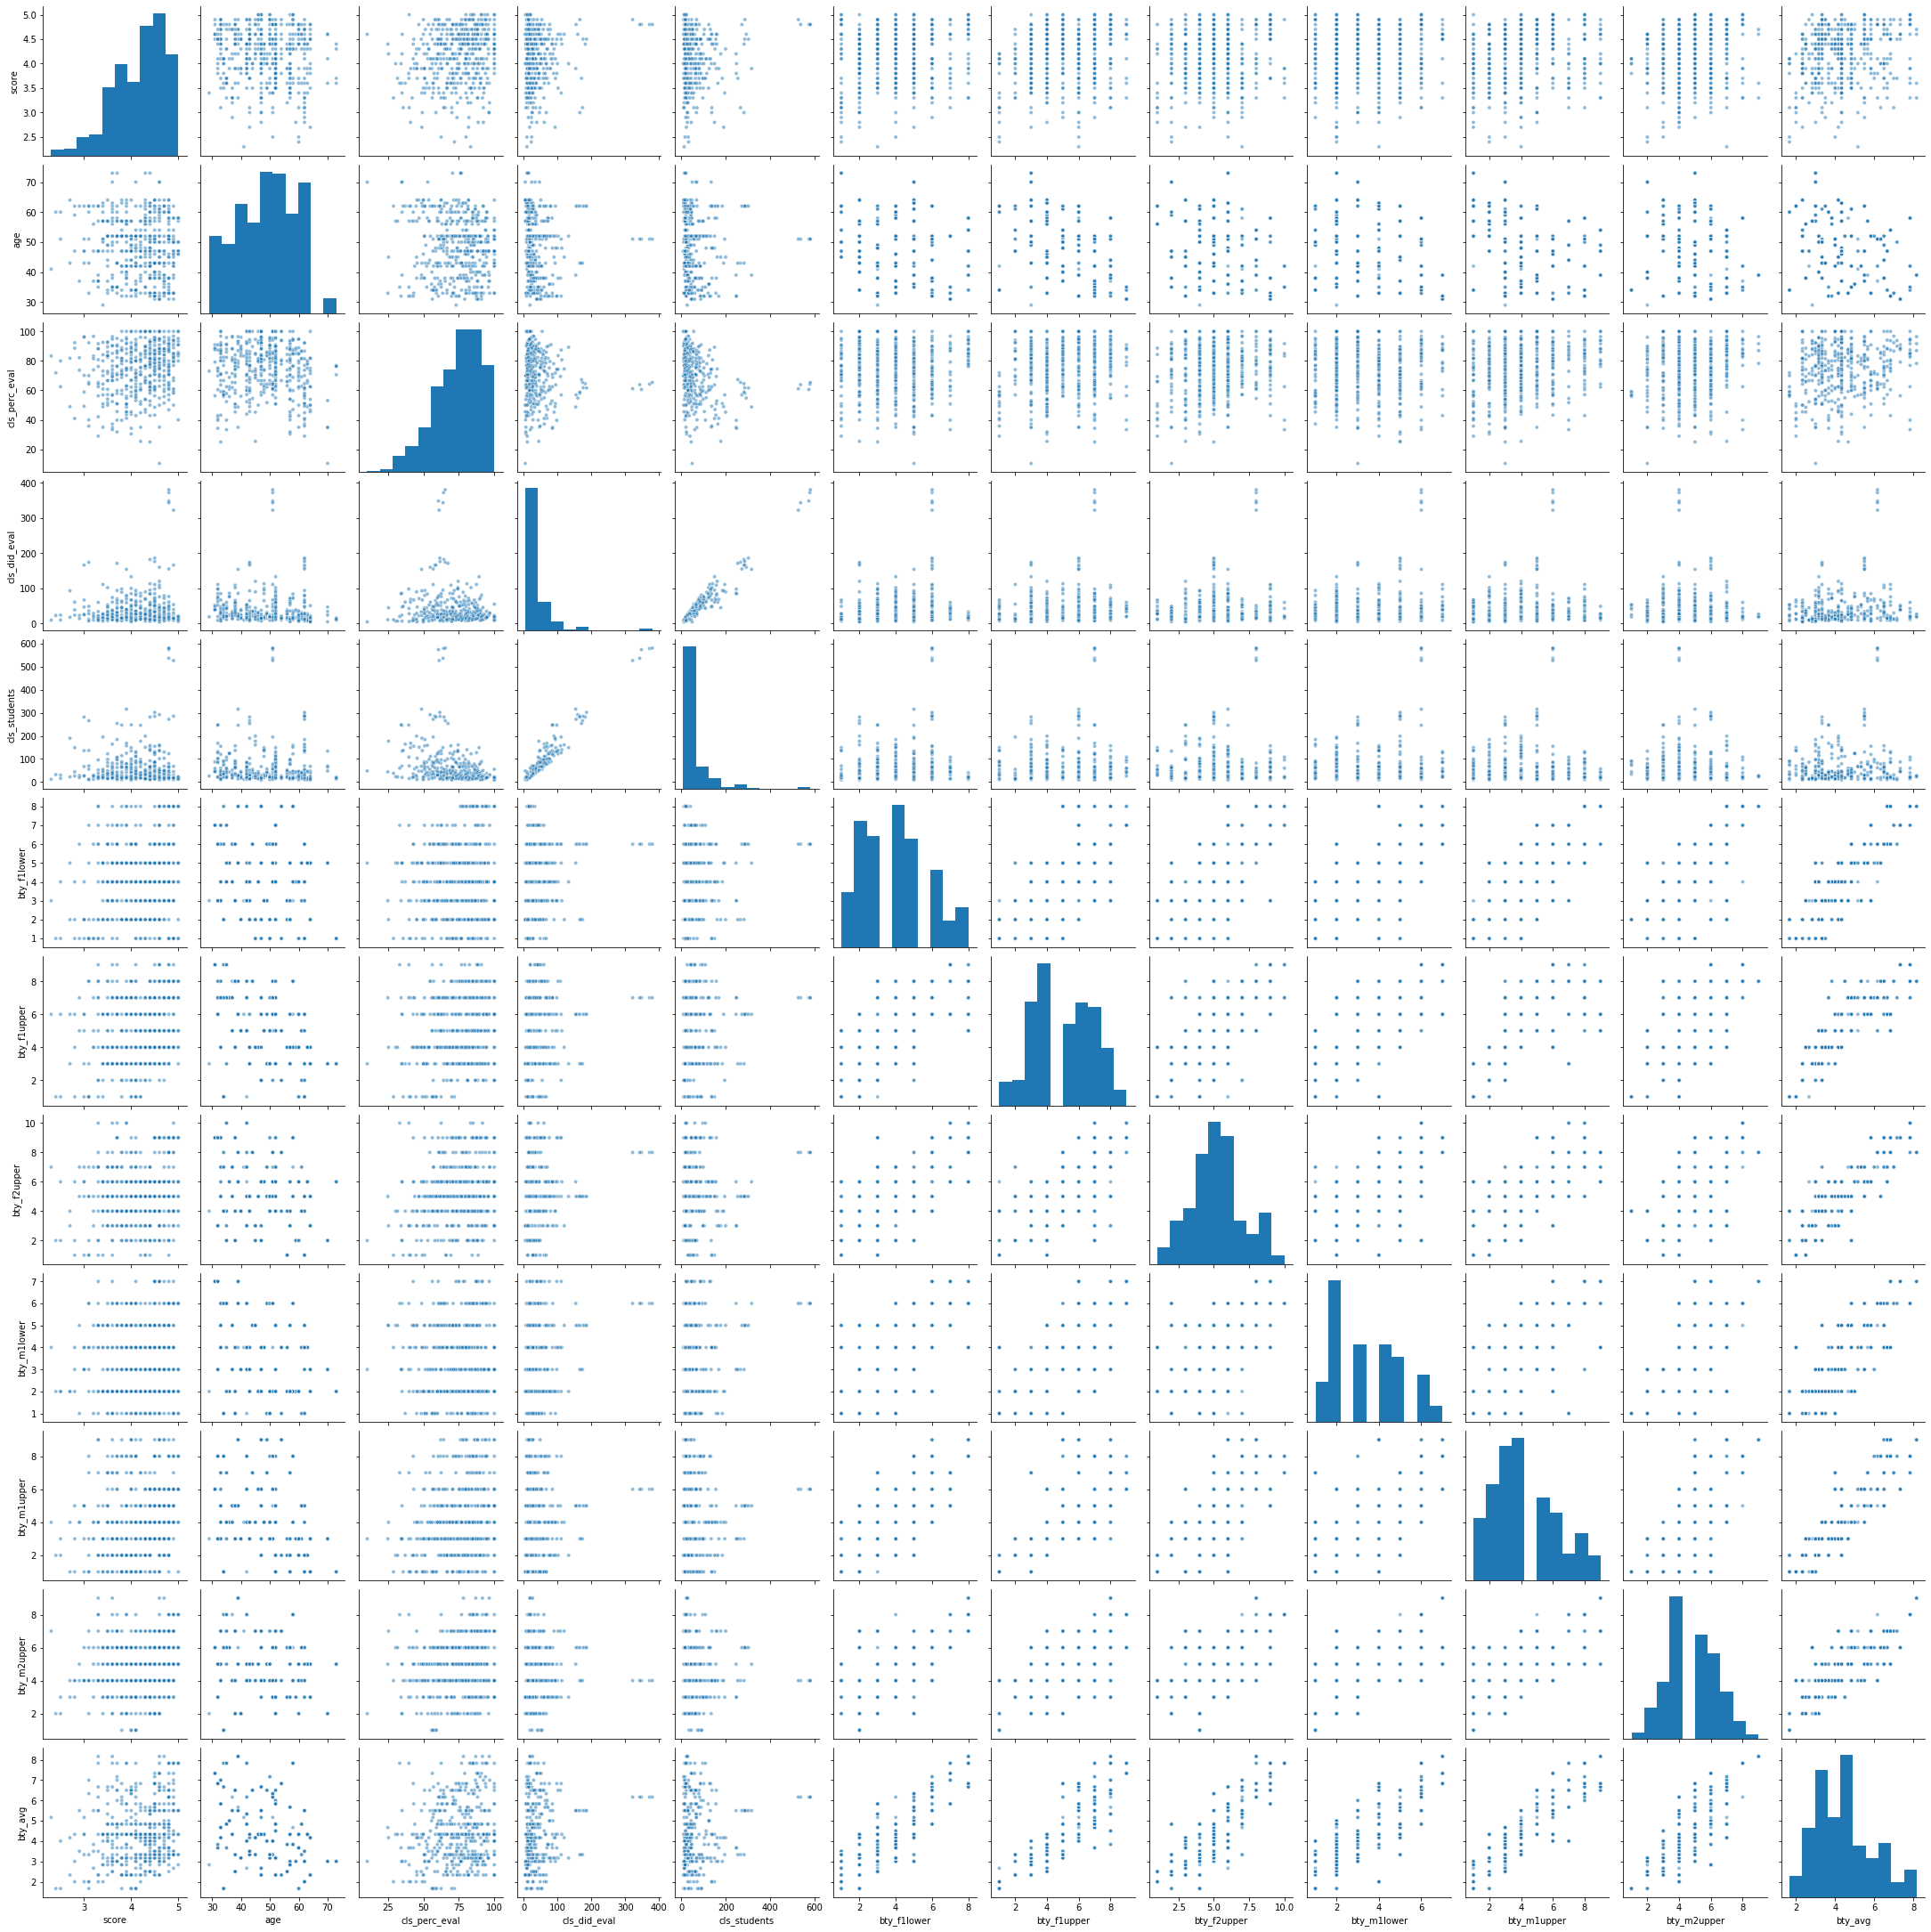

In [0]:
sns.pairplot(df, plot_kws={'alpha':0.5, 'size': 0.1})

With so many numeric variables, the pair plot is hard to read. We can
create a pairplot excluding some variables that we don’t expect to be
useful for visualization: `cls_perc_eval`, `cls_did_eval`. We will also
exclude the individual attractiveness ratings `bty_f1lower`,
`bty_f1upper`, `bty_f2upper`, `bty_m1lower`, `bty_m1upper`,
`bty_m2upper`, since the overall attractiveness rating is still
represented by `bty_avg`.

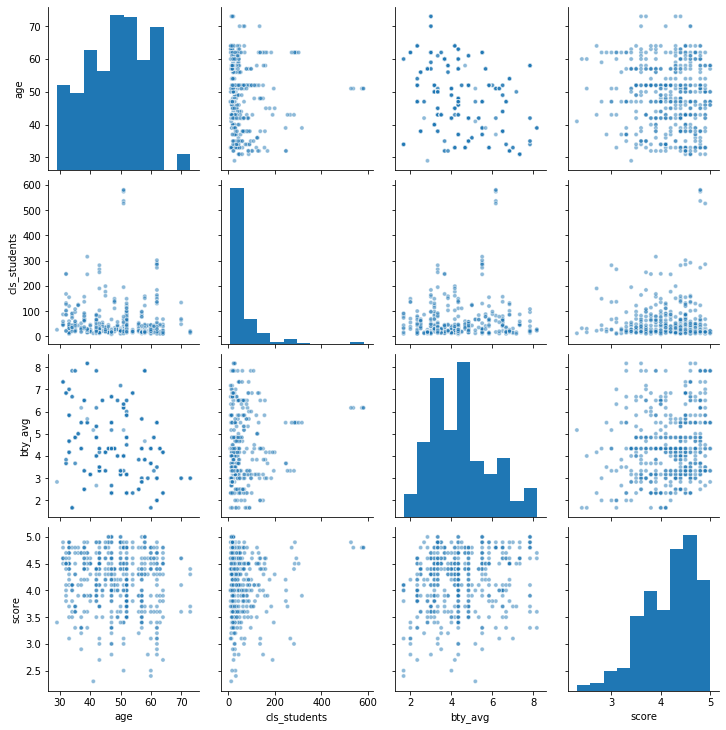

In [0]:
sns.pairplot(df, vars=['age', 'cls_students', 'bty_avg', 'score'], plot_kws={'alpha':0.5, 'size': 0.1})

As part of our exploration of the data, we can also examine the effect
of non-numeric variables related to the instructor and the class:
`rank`, `ethnicity`, `gender`, `language`, `cls_level`, `cls_profs`,
`cls_credits`.

In [0]:
for feature in ['rank', 'ethnicity', 'gender', 'language', 'cls_level', 'cls_profs', 'cls_credits']:
    df.groupby([feature])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
rank,,,,,,,,
teaching,102.0,4.284314,0.498263,3.3,3.9,4.40,4.7,5.0
tenure track,108.0,4.154630,0.561104,2.3,3.7,4.35,4.6,4.9
tenured,253.0,4.139130,0.550262,2.4,3.8,4.20,4.6,5.0


,count,mean,std,min,25%,50%,75%,max
ethnicity,,,,,,,,
minority,64.0,4.071875,0.581588,2.7,3.675,4.05,4.525,5.0
not minority,399.0,4.191228,0.536505,2.3,3.850,4.30,4.600,5.0


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,195.0,4.092821,0.563814,2.3,3.7,4.1,4.5,5.0
male,268.0,4.234328,0.521896,2.4,3.9,4.3,4.6,5.0


,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
english,435.0,4.189655,0.547183,2.3,3.9,4.30,4.6,5.0
non-english,28.0,3.942857,0.434979,3.4,3.6,3.75,4.4,4.8


,count,mean,std,min,25%,50%,75%,max
cls_level,,,,,,,,
lower,157.0,4.238217,0.592532,2.5,3.8,4.4,4.7,5.0
upper,306.0,4.142157,0.515104,2.3,3.8,4.2,4.5,5.0


,count,mean,std,min,25%,50%,75%,max
cls_profs,,,,,,,,
multiple,306.0,4.184641,0.551177,2.4,3.8,4.3,4.6,5.0
single,157.0,4.155414,0.530529,2.3,3.8,4.3,4.6,5.0


,count,mean,std,min,25%,50%,75%,max
cls_credits,,,,,,,,
multi credit,436.0,4.147018,0.542464,2.3,3.8,4.2,4.6,5.0
one credit,27.0,4.622222,0.334357,3.5,4.5,4.7,4.9,5.0


#### Question 1

Describe the relationship between `score` and the overall attractiveness
rating `bty_avg`. Is there an apparent correlation? If so, is it a
positive or a negative correlation? What about `age` and `cls_students`,
do they appear to be correlated with `score`?

Also describe the relationship between `score` and the categorical
variables you explored above that are related to characteristics of the
*instructor*: `rank`, `ethnicity`, `gender`, `language`. Which of these
variables have an apparent correlation with `score`? Is it a positive or
a negative correlation?

Are any of the apparent relationships you observed unexpected to you?
Explain.

Edit this cell and write your answer below the line.

------------------------------------------------------------------------
Initially,there is no visible(from scatter plot) apparent correlation between `score` and `bty_avg`.However,heatmap of the following features depicts a positive correlation between both with value 0.2.   
Both `age` and `cls_students` are not apparently correlated to `score`.    
`rank` is positively correlated with `score`. 

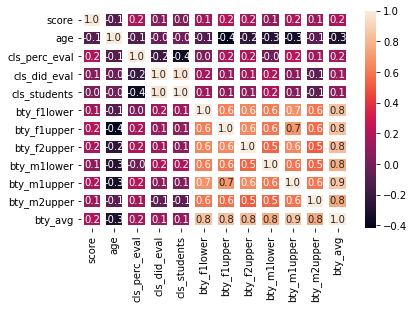

In [0]:
import seaborn as sns
sns.heatmap(df.iloc[:,:].corr(), annot=True, linewidths = 5, fmt = '.1f')

### Encoding categorical variables

For *one hot encoding* of categorical variables, we can use the
`get_dummies` function in `pandas`. Create a copy of the dataframe with
all categorical variables transformed into indicator (“dummy”)
variables, and save it in a new data frame called `df_enc`. Compare the
columns of the `df` data frame versus the `df_enc` data frame.

In [0]:
df_enc = pd.get_dummies(df)
#df_enc.columns
df_enc.shape, df.shape

((463, 31), (463, 21))

### Split data

Next, we split the encoded data into a training set (70%) and validation
set (30%). We will be especially interested in evaluating the model
performance on the validation set. Since it was not used to train the
model parameters (intercept and coefficients), the performance on this
data gives us a better idea of how the model may perform on new data.

We’ll use the `train_test_split` method in `sklearn`’s `model_selection`
module. Since it randomly splits the data, we’ll pass a random “state”
into the function that makes the split repeatable (same split every time
we run this notebook) and ensures that everyone in the class will have
exactly the same split.

In [0]:
train, validation = model_selection.train_test_split(df_enc, test_size=0.3, random_state=9)
# why 9? see https://dilbert.com/strip/2001-10-25
train.shape
validation.shape

(324, 31)

(139, 31)

### Simple linear regression

Now we are finally ready to train a regression model.

Since the article is nominally abou the attractiveness of the
instructor, we will train the simple linear regression on the `bty_avg`
feature.

In the cell that follows, write code to

-   use `sklearn` to fit a simple linear regression model on the
    training set, using `bty_avg` as the feature on which to train. Save
    your fitted model in a variable `reg_simple`.
-   print the intercept and coefficient of the model.
-   use `predict` on the fitted model to estimate the evaluation score
    on the training set, and save this array in `y_pred_train`.
-   use `predict` on the fitted model to estimate the evaluation score
    on the training set, and save this array in `y_pred_valid`.

Then run the cell after that one, which will show you the training data,
the validation data, and your regression line.

In [0]:
# TODO 1
 reg_simple = LinearRegression().fit(train[['bty_avg']],train['score'])
 y_pred_train = reg_simple.predict(train[['bty_avg']])
 y_pred_valid = reg_simple.predict(validation[['bty_avg']])


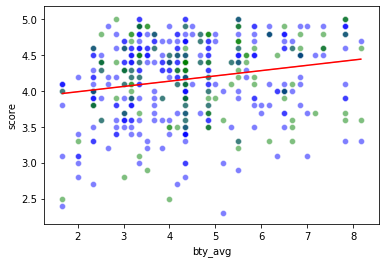

In [0]:
sns.scatterplot(data=train, x="bty_avg", y="score", color='blue', alpha=0.5);
sns.scatterplot(data=validation, x="bty_avg", y="score", color='green', alpha=0.5);
sns.lineplot(data=train, x="bty_avg", y=y_pred_train, color='red');

### Evaluate simple linear regression performance

Now we will evaluate our model performance.

In the following cell, write a *function* to compute key performance
metrics for your model:

-   compute the R2 score on your training data, and print it
-   compute the RSS per sample on your training data, and print it
-   compute the RSS per sample, divided by the sample variance of
    `score`, on your training data, and print it. Recall that this
    metric tells us the ratio of average error of your model to average
    error of prediction by mean.
-   and compute the same three metrics for your validation set

In [0]:
# TODO 2 by student - fill in the function -

def print_regression_performance(y_true_train, y_pred_train, y_true_valid, y_pred_valid):
    r2_bt = 1-np.mean( (y_pred_train - y_true_train)**2 / np.std(y_true_train)**2 )
    r2_bt_sk = metrics.r2_score(y_true_valid, y_pred_valid)
    rss_bt = np.mean( (y_pred_valid - y_true_valid)**2  )
    rss_bt_sk = metrics.mean_squared_error(y_true_valid, y_pred_valid)
    reg_score = pd.DataFrame(data = [['bty_avg',r2_bt,r2_bt_sk,rss_bt,rss_bt_sk]],columns=['','r2','r2_sk','rss','rss_sk'])
    return reg_score
  



Call your function to print the performance of the simple linear
regression. Is a simple linear regression on `bty_avg` better than a
“dumb” model that predicts the mean value of `score` for all samples?

In [0]:
print_regression_performance(train['score'], y_pred_train, validation['score'], y_pred_valid)

,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.042169,0.011239,0.279965,0.279965


### Multiple linear regression

Next, we’ll see if we can improve model performance using multiple
linear regression, with more features included.

To start, we need to decide which features to use as input to our model.
One possible approach is to use every feature in the dataset excluding
the target variable, `score`.

You can build and view this list of features by running:

In [0]:
features = df_enc.columns.drop(['score'])
features

Index(['age', 'cls_perc_eval', 'cls_did_eval', 'cls_students', 'bty_f1lower',
       'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper',
       'bty_m2upper', 'bty_avg', 'rank_teaching', 'rank_tenure track',
       'rank_tenured', 'ethnicity_minority', 'ethnicity_not minority',
       'gender_female', 'gender_male', 'language_english',
       'language_non-english', 'cls_level_lower', 'cls_level_upper',
       'cls_profs_multiple', 'cls_profs_single', 'cls_credits_multi credit',
       'cls_credits_one credit', 'pic_outfit_formal', 'pic_outfit_not formal',
       'pic_color_black&white', 'pic_color_color'],
      dtype='object')

In the following cell, write code to

-   use `sklearn` to fit a linear regression model on the training set,
    using the `features` array as the list of features to train on. Save
    your fitted model in a variable `reg_multi`.
-   print a table of the features used in the regression and the
    coefficient assigned to each. If you have saved your fitted
    regression in a variable named `reg_multi`, you can create and print
    this table with:

``` python
df_coef = pd.DataFrame(data = 
                        {'feature': features, 
                         'coefficient': reg_multi.coef_})
df_coef
```

In [0]:
# TODO 3 by student
# reg_multi = ...
reg_multi = LinearRegression().fit(train[features],train['score'])
df_coef = pd.DataFrame(data = 
                        {'feature': features, 
                         'coefficient': reg_multi.coef_})
df_coef


,feature,coefficient
0,age,-0.009493
1,cls_perc_eval,0.004385
2,cls_did_eval,0.002983
3,cls_students,-0.001427
4,bty_f1lower,7.022264
5,bty_f1upper,7.052930
6,bty_f2upper,7.032261
7,bty_m1lower,6.959419
8,bty_m1upper,6.999172
9,bty_m2upper,6.978719


#### Question 2

Look at the list of features and coefficients, especially those related
to the attractiveness ratings.

Are these results surprising, based on the results of the simple linear
regression? Explain your answer.

Edit this cell and write your answer below the line.

------------------------------------------------------------------------
Results show positive correlation between attractiveness ratings and score.Whereas from the results of the simple linear regression there is no apparent correlation between them.   
The attractiveness features separately seems to have a large effect than with the average attractiveness rankings. some of the same variance in the dependent variable, which in turn reduces their statistical significance.

### Effect of collinearity

Note especially the coefficients associated with each of the individual
attractiveness rankings, and the coefficient associated with the average
attractiveness ranking. Each of these features separately seems to have
a large effect; however, because they are strongly *collinear*, they
cancel one another out.

(You should be able to see the collinearity clearly in the pairplot you
created.)

In the following cell, write code to

-   create a new `features` array, that drops the *individual*
    attractiveness rankings in addition to the `score` variable (but do
    *not* drop the average attractiveness ranking)
-   use `sklearn` to fit a linear regression model on the training set,
    using the new `features` array as the list of features to train on.
    Save your fitted model in a variable `reg_avgbty`.
-   print a table of the features used in the regression and the
    coefficient assigned to each.

In [0]:
# TODO 4 by student
 features = df_enc.columns.drop(['score', 'bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper'])
 reg_avgbty = LinearRegression().fit(train[features],train['score'])
df_coef = pd.DataFrame(data = 
                        {'feature': features, 
                         'coefficient': reg_avgbty.coef_})
df_coef


,feature,coefficient
0,age,-0.009297
1,cls_perc_eval,0.004900
2,cls_did_eval,0.003737
3,cls_students,-0.001740
4,bty_avg,0.040577
5,rank_teaching,0.075283
6,rank_tenure track,-0.059429
7,rank_tenured,-0.015854
8,ethnicity_minority,-0.111830
9,ethnicity_not minority,0.111830


#### Question 3

Given the model parameters you have found, rank the following features
from “strongest effect” to “weakest effect” in terms of their effect (on
average) on the evaluation score:

-   Instructor ethnicity
-   Instructor gender

(Note that in general, we cannot use the coefficient to compare the
effect of features that have a different range. Both ethnicity and
gender are represented by binary one hot-encoded variables.)

Edit this cell and write your answer below the line.

------------------------------------------------------------------------
Instructor ethnicity,Instructor gender.

### Evaluate multiple regression model performance

Evaluate the performance of your `reg_avgbty` model. In the next cell,
write code to:

-   use the `predict` function on your fitted regression to find $\hat{y}$ for all samples in the *training* set, and save this in an
    array called `y_pred_train`
-   use the `predict` function on your fitted regression to find $\hat{y}$ for all samples in the *validation* set, and save this in
    an array called `y_pred_valid`
-   call the `print_regression_performance` function you wrote in a
    previous cell, and print the performance metrics on the training and
    validation set.

In [0]:
# TODO 5 by student
# y_pred_train = ...
# y_pred_valid = ...
y_pred_train_avgby = reg_avgbty.predict(train[features])
y_pred_valid_avgby = reg_avgbty.predict(validation[features])
print_regression_performance(train['score'], y_pred_train_avgby, validation['score'], y_pred_valid_avgby)

,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.21085,0.109995,0.252002,0.252002


#### Question 4

Based on the analysis above, what portion of the variation in instructor
teaching evaluation can be explained by the factors unrelated to
teaching performance, such as the physical characteristics of the
instructor?

Edit this cell and write your answer below the line.

------------------------------------------------------------------------------
Appoximately 21%  of the variation can be explained by the factors usuch as physical characteristics of the instructor.


#### Question 5

Based on the analysis above, is your model better at predicting
instructor teaching scores than a “dumb” model that just assigns the
mean teaching score to every instructor? Explain.

Edit this cell and write your answer below the line.

------------------------------------------------------------------------
Yes this model is better at predicting intructor teching scores than a 'dumb' model.This model gives a more accurate score than a model which assigns mean teaching score to every instructor.

#### Question 6

Suppose you are hired by the ECE department to develop a classifer that
will identify high-performing faculty, who will then be awarded prizes
for their efforts.

Based on the analysis above, do you think it would be fair to use scores
on teaching evaluations as an input to your classifier? Explain your
answer.

Edit this cell and write your answer below the line.

------------------------------------------------------------------------
It would not be fair to use scores on teaching evaluations as features regarding pysical attrativeness can cause 21% variations which may effect the scores of faculty. 

### Exploring unexpected correlation

There are some features that we do *not* expect to be correlated with
the instructor’s score.

For example, consider the “features” related to the photograph used by
the students who rated the instructor’s attractiveness.

There is no reason that characteristics of an instructor’s photograph -
whether it was in black and white or color, how the instructor was
dressed in the photograph - should influence the ratings of students in
the instructor’s class. These students most likely did not even see the
photograph.

In the next cell, write code to

-   create a new `features` array that drops the `score` variable, all
    of the individual attractiveness rankings, and the variables related
    to the photograph used for attractiveness rankings.
-   use it to fit a model (saved in `reg_nopic`).
-   use `reg_nopic` to predict the evaluation scores on both the
    training and validation set
-   compute the same set of metrics as above.

In [0]:
# TODO 6 by student
features = df_enc.columns.drop(['score', 'bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'pic_outfit_formal','pic_outfit_not formal',	'pic_color_black&white', 'pic_color_color'])
reg_nopic = LinearRegression().fit(train[features],train['score'])
df_coef = pd.DataFrame(data = 
                        {'feature': features, 
                         'coefficient': reg_nopic.coef_})
df_coef

y_pred_train_avgby = reg_nopic.predict(train[features])
y_pred_valid_avgby = reg_nopic.predict(validation[features])
print_regression_performance(train['score'], y_pred_train_avgby, validation['score'], y_pred_valid_avgby)

,feature,coefficient
0,age,-0.007942
1,cls_perc_eval,0.005658
2,cls_did_eval,0.002492
3,cls_students,-0.000944
4,bty_avg,0.059677
5,rank_teaching,0.048819
6,rank_tenure track,-0.050225
7,rank_tenured,0.001405
8,ethnicity_minority,-0.136311
9,ethnicity_not minority,0.136311


,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.196337,0.063476,0.265174,0.265174


#### Question 7

Is your model less predictive when features related to the instructor
photograph are excluded? Explain.

Edit this cell and write your answer below the line.

------------------------------------------------------------------------------There is no significant change in the prediction of model when features related to the instructor photograph are excluded.The score is not very dependent on these features than other.

Finally, we will observe the effect of excluding class-related variables
(whether it is an upper-division or lower-division class, number of
credits, etc.)

In the next cell, write code to:

-   create a new `features` array that drops the `score` variable, all
    of the individual attractiveness rankings, the variables related to
    the photograph used for attractiveness rankings, *and* all of the
    variables that begin with the `cls` prefix.
-   use it to fit a model (saved in `reg_nocls`).
-   use `reg_nocls` to predict the evaluation scores on both the
    training and validation set
-   compute the same set of metrics as above.

In [0]:
# TODO 7 by student



features = df_enc.columns.drop(['cls_perc_eval',
'cls_did_eval',
'cls_students',
'cls_level_lower',
'cls_level_upper',	
'cls_profs_multiple',
'cls_profs_single',
'cls_credits_multi credit',
'cls_credits_one credit',
'score', 'bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'pic_outfit_formal','pic_outfit_not formal',	'pic_color_black&white', 'pic_color_color'])
reg_nocls = LinearRegression().fit(train[features],train['score'])
df_coef = pd.DataFrame(data = 
                        {'feature': features, 
                         'coefficient': reg_nocls.coef_})
df_coef


,feature,coefficient
0,age,-0.009353
1,bty_avg,0.068821
2,rank_teaching,0.117697
3,rank_tenure track,-0.080232
4,rank_tenured,-0.037465
5,ethnicity_minority,-0.061153
6,ethnicity_not minority,0.061153
7,gender_female,-0.105433
8,gender_male,0.105433
9,language_english,0.078486


When a machine learning model seems to use a feature that is not
expected to be correlated with the target variable (such as the
characteristics of the instructor’s photograph…), this can sometimes be
a signal that information is “leaking” between the training and
validation set.

In this dataset, each row represents a single course. However, some
instructors teach more than one course, and an instructor might get
similar evaluation scores on all of the courses he or she teaches.
(According to the paper for which this dataset was collected, 94 faculty
members taught the 463 courses represented in the dataset, with some
faculty members teaching as many as 13 courses.)

For example, consider the output of the following command, which prints
all of the one credit courses in the data:

In [0]:
df.loc[df['cls_credits']=='one credit']

,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,cls_profs,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
124,3.5,teaching,not minority,female,english,52,89.47369,17,19,upper,multiple,one credit,6,6,4,2,4,7,4.833,not formal,color
179,4.4,tenure track,minority,female,english,47,100.00000,16,16,lower,single,one credit,2,6,6,3,5,4,4.333,not formal,color
185,4.6,tenure track,minority,female,english,47,95.23810,20,21,lower,single,one credit,2,6,6,3,5,4,4.333,not formal,color
245,4.2,teaching,not minority,female,english,50,75.00000,24,32,lower,single,one credit,2,3,5,2,3,4,3.167,not formal,color
246,4.7,teaching,not minority,female,english,50,66.66666,14,21,lower,single,one credit,2,3,5,2,3,4,3.167,not formal,color
339,4.8,tenure track,not minority,male,english,43,53.57143,15,28,lower,multiple,one credit,3,4,4,2,4,4,3.500,not formal,color
340,4.9,tenure track,not minority,male,english,43,60.00000,18,30,lower,multiple,one credit,3,4,4,2,4,4,3.500,not formal,color
343,4.5,tenure track,not minority,male,english,43,94.44444,17,18,lower,multiple,one credit,3,4,4,2,4,4,3.500,not formal,color
344,4.9,tenure track,not minority,male,english,43,84.61539,22,26,lower,multiple,one credit,3,4,4,2,4,4,3.500,not formal,color
345,4.4,tenure track,not minority,male,english,43,60.00000,18,30,lower,multiple,one credit,3,4,4,2,4,4,3.500,not formal,color


We observe that 10 out of 27 one-credit courses are taught by what seems
to be the same instructor - an individual who is a teaching-track
professor, minority ethnicity, male, English-language trained, 50 years
old, average attractiveness 3.333, and whose photograph is in color and
not formal.

This provides a clue regarding the apparent importance of the
`cls_credits` variable and other “unexpected” variables in predicting
the teaching score. Certain variables may be used by the model to
identify the instructor and then learn a relationship between the
individual instructor and his or her typical evaluation score, instead
of learning a true relationship between the variable and the evaluation
score.

To explore this issue further, we will repeat our analysis using two
different ways of splitting the dataset:

1.  random split
2.  random split that ensures that each individual *instructor* is
    represented in the training data or the validation data, but not
    both.

In the latter case, if the regression model is effectively identifying
individual instructors, rather than learning true relationships between
instructor/course characteristics and teaching ratings, then the model
will perform much worse on the validation set for this type of split.
This is because the instructors it has “learned” are not present in the
validation set.

First, we will assign an “instructor ID” to each row in our data frame:

In [0]:
instructor_id = df[['rank', 'ethnicity', 'gender', 'language',
        'pic_outfit', 'pic_color']].agg('-'.join, axis=1)
instructor_id +=  '-' + df['age'].astype(str)
instructor_id +=  '-' + df['bty_avg'].astype(str)

df_enc = df_enc.assign(instructor_id = instructor_id)

df_enc['instructor_id'].head()

0    tenure track-minority-female-english-not forma...
1    tenure track-minority-female-english-not forma...
2    tenure track-minority-female-english-not forma...
3    tenure track-minority-female-english-not forma...
4    tenured-not minority-male-english-not formal-c...
Name: instructor_id, dtype: object

Now we will perform our splits, train a model, and print performance
metrics according to the first scheme, in which an instructor may be
present in both the training set and the validation set.

In the following cell, add code as indicated:

In [0]:

ss = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, random_state=9)

for train_idx, validation_idx in ss.split(df_enc):
    train = df_enc.iloc[train_idx]
    validation = df_enc.iloc[validation_idx]
        
    features = df_enc.columns.drop(['score', 'instructor_id'])
    print('----')

    # TODO 8 by student: add code to train a multiple linear regression using 
    # the train dataset and the list of features created above
    # save the fitted model in reg_rndsplit
    # then use the model to create y_pred_train and y_pred_valid, 
    # the model predictions on the training set and validation set.
    # Finally, use print_regression_performance to see the 
    # model performance
    #
    # reg_rndsplit = ...
    # y_pred_train = ...
    # y_pred_valid = ...

    reg_rndsplit = LinearRegression().fit(train[features],train['score'])
    y_pred_train_avgby = reg_rndsplit.predict(train[features])
    y_pred_valid_avgby = reg_rndsplit.predict(validation[features])
    print_regression_performance(train['score'], y_pred_train, validation['score'], y_pred_valid)


----


,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.042169,0.011239,0.279965,0.279965


----


,,r2,r2_sk,rss,rss_sk
0,bty_avg,-0.078289,-0.066753,0.290487,0.290487


----


,,r2,r2_sk,rss,rss_sk
0,bty_avg,-0.063147,-0.055728,0.309444,0.309444


----


,,r2,r2_sk,rss,rss_sk
0,bty_avg,-0.047428,-0.026748,0.357886,0.357886


----


,,r2,r2_sk,rss,rss_sk
0,bty_avg,-0.070935,-0.027199,0.379676,0.379676


----


,,r2,r2_sk,rss,rss_sk
0,bty_avg,-0.042073,-0.08699,0.295649,0.295649


----


,,r2,r2_sk,rss,rss_sk
0,bty_avg,-0.061119,-0.062517,0.327056,0.327056


----


,,r2,r2_sk,rss,rss_sk
0,bty_avg,-0.083957,0.015604,0.287983,0.287983


----


,,r2,r2_sk,rss,rss_sk
0,bty_avg,-0.064705,-0.024953,0.325123,0.325123


----


,,r2,r2_sk,rss,rss_sk
0,bty_avg,-0.075945,-0.119563,0.339537,0.339537


Then, we will perform our splits, train a model, and print performance
metrics according to the second scheme, in which an instructor may be
present in either the training set or the validation set, but not both.

In the following cell, add code as indicated:

In [0]:

gss = model_selection.GroupShuffleSplit(n_splits=10, test_size=0.3, random_state=9)
acc = 0
for train_idx, validation_idx in gss.split(df_enc, groups=instructor_id):
    train = df_enc.iloc[train_idx]
    validation = df_enc.iloc[validation_idx]
        
    features = df_enc.columns.drop(['score', 'instructor_id'])

    # TODO 9 by student: add code to train a multiple linear regression using 
    # the train dataset and the list of features created above
    # save the fitted model in reg_grpsplit
    # then use the model to create y_pred_train and y_pred_valid, 
    # the model predictions on the training set and validation set.
    # Finally, use print_regression_performance to see the 
    # model performance
    #
    # reg_grpsplit = ...
    # y_pred_train = ...
    # y_pred_valid = ...
    reg_grpsplit = LinearRegression().fit(train[features],train['score'])
    y_pred_train_g = reg_grpsplit.predict(train[features])
    y_pred_valid_g = reg_grpsplit.predict(validation[features])
    print_regression_performance(train['score'], y_pred_train_g, validation['score'], y_pred_valid_g)


,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.266158,-0.108004,0.28991,0.28991


,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.282,-0.197594,0.368528,0.368528


,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.290361,-0.16151,0.335828,0.335828


,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.281277,-0.170325,0.330167,0.330167


,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.319919,-0.647968,0.486751,0.486751


,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.176171,0.047797,0.299241,0.299241


,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.300483,-0.904934,0.446599,0.446599


,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.287227,-0.147132,0.372595,0.372595


,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.324288,-0.278453,0.431646,0.431646


,,r2,r2_sk,rss,rss_sk
0,bty_avg,0.273141,-0.146815,0.32926,0.32926


#### Question 8

Based on your analysis above, do you think your model will be useful to
predict the teaching evaluation scores of a new faculty member at UT
Austin, based on his or her physical characteristics and the
characteristics of the course? Explain your answer.

Edit this cell and write your answer below the line.

------------------------------------------------------------------------------
Yes this model can be used to predict the teaching evaluation scores of faculty based on his or her physical characteristics and the characteristics of the course.